# Tugas MFCCs

# 1. Imput signal

In [ ]:
#Library
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np

: 

In [2]:
#load an audio file
audio_file ="audio/Halo.wav"
ipd.Audio(audio_file)

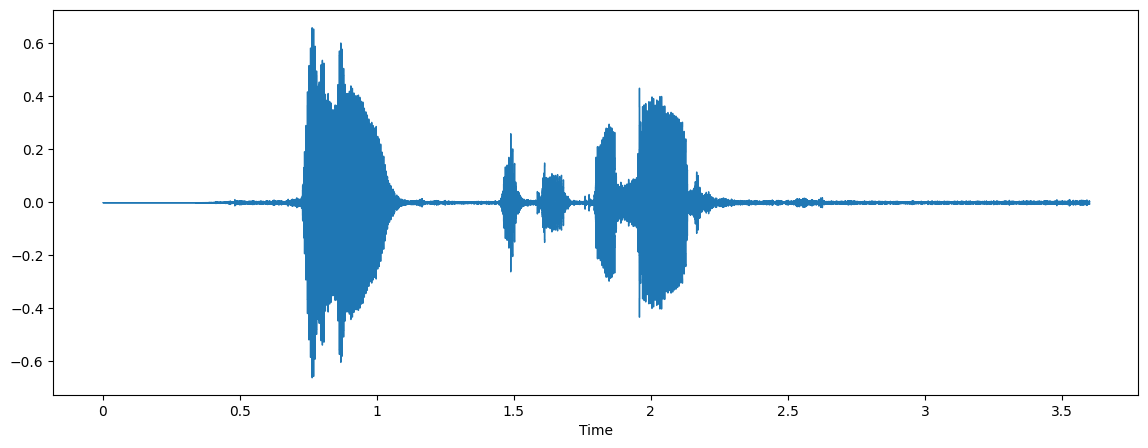

In [3]:
# load sounds
Halo1, samplerate = librosa.load(audio_file)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(Halo1, sr=samplerate)

# 2. DFT

[0.41341992 0.63656311 0.7018665  ... 0.92129507 0.7018665  0.63656311]


(79360,)

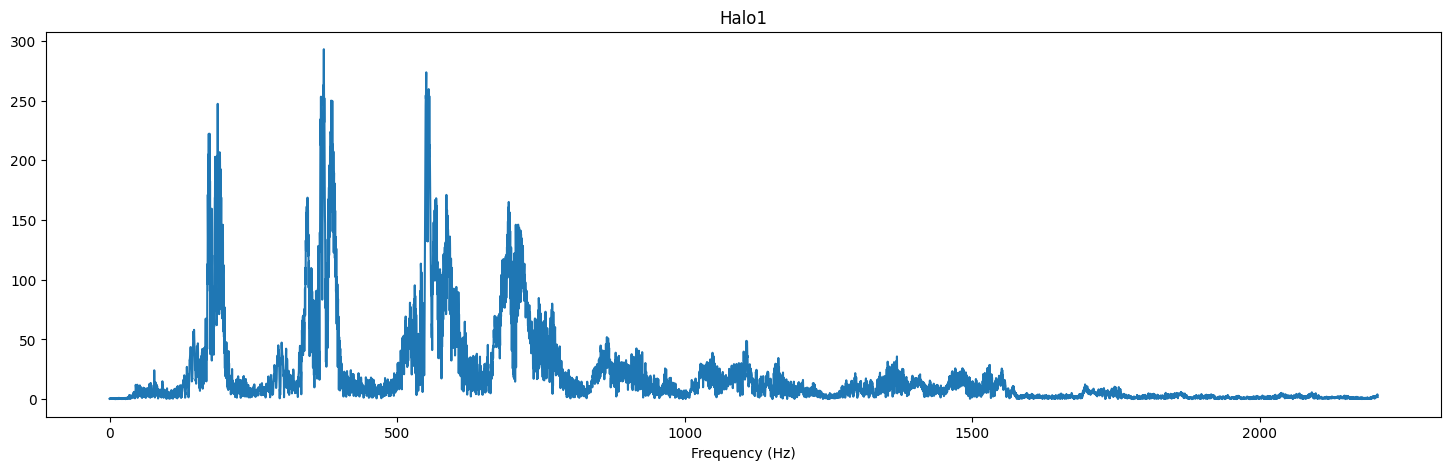

In [18]:
data = np.fft.fft(Halo1) #Hasil Spectrum dari FFT
data_mag = np.absolute(data) #Magnitude spectrum
    
plt.figure(figsize=(18, 5))
    
f = np.linspace(0, samplerate, len(data_mag))
f_bins = int(len(data_mag)*0.1)  
    
plt.plot(f[:f_bins], data_mag[:f_bins])
plt.xlabel('Frequency (Hz)')
plt.title("Halo1")
print(data_mag)
data_mag.shape

# 3. Log-Amplitude Spectrum

[-3.83608599 -1.96158536 -1.53745488 ... -0.35601253 -1.53745488
 -1.96158536]


(79360,)

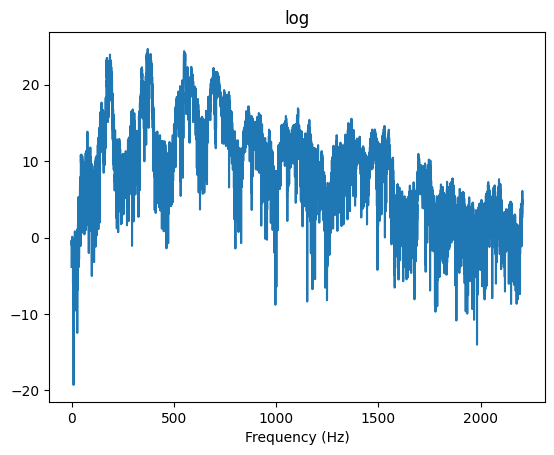

In [16]:
log_spectrum = librosa.power_to_db(data_mag)
f = np.linspace(0, samplerate, len(log_spectrum))
f_bins = int(len(log_spectrum)*0.1)  
    
plt.plot(f[:f_bins], log_spectrum[:f_bins])
plt.xlabel('Frequency (Hz)')
plt.title("log")

print (log_spectrum)
log_spectrum.shape

# 4.Mel-Scaling

In [6]:
n_fft = 2048
hop_length = 512
stft = librosa.stft(log_spectrum, n_fft=n_fft, hop_length=hop_length)

In [7]:
magnitude = np.abs(stft)

In [8]:
N_mels = 40
#mel_frequencies = librosa.mel_frequencies(n_mels=40, fmin=0, fmax=samplerate/2)
# Generate the triangular Mel filter bank
mel_filter = librosa.filters.mel(sr=samplerate,fmin=0, fmax=None, n_fft=2048, n_mels=N_mels)

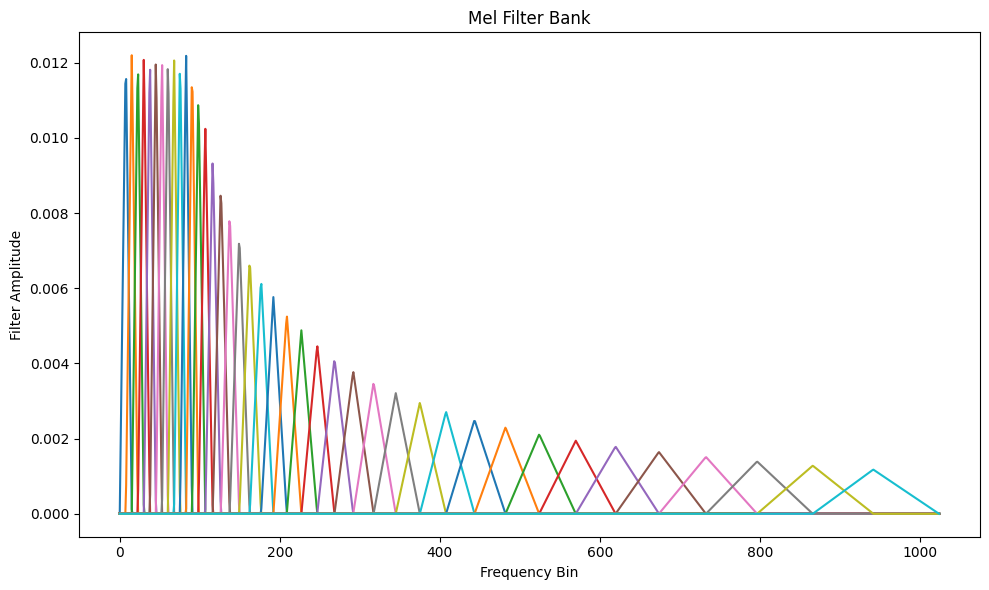

[[-0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 1.6347201e-03  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 3.2694403e-03  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  2.8632136e-05]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.4316068e-05]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [19]:
# Plot the Mel scale and filter bank
plt.figure(figsize=(10, 6))
# Plot the triangular Mel filter bank
plt.subplot(1, 1, 1)
plt.plot(np.arange(n_fft//2+1), mel_filter.T)
plt.xlabel('Frequency Bin')
plt.ylabel('Filter Amplitude')
plt.title('Mel Filter Bank')

plt.tight_layout()
plt.show()
print(mel_filter.T)

In [20]:
mel_spectrum = np.dot(magnitude.T, mel_filter.T)
print(mel_spectrum)

[[62.96349357 19.58807475  8.70273111 ...  4.48805142  3.49666101
   3.29579759]
 [87.86987573 27.83170607 17.86706696 ...  5.35710499  3.75924167
   3.66033072]
 [82.25560747 32.53334283 19.31159527 ...  4.08963312  3.08645302
   2.80955304]
 ...
 [82.25560747 32.53334283 19.31159527 ...  4.08963312  3.08645302
   2.80955304]
 [87.87149403 27.83901703 17.85894484 ...  5.35881857  3.77130141
   3.66110179]
 [62.96251178 19.72292924  8.78780848 ...  4.4897548   3.49513795
   3.29497605]]


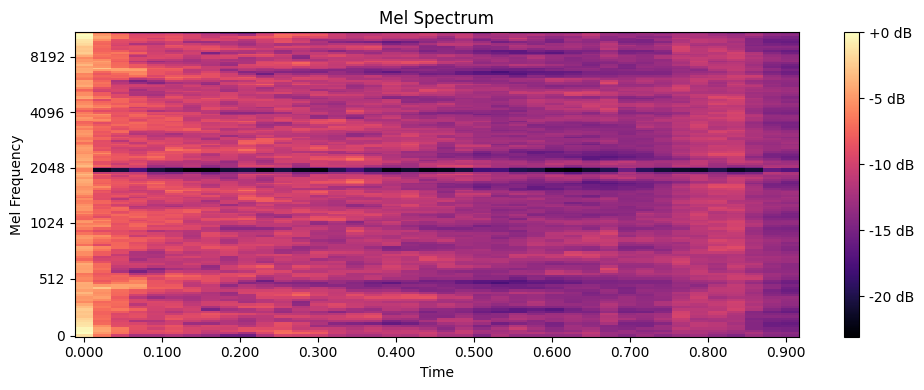

[[-1.44759193e+00 -6.51856258e+00 -1.00419245e+01 ... -1.29179019e+01
  -1.40019448e+01 -1.42588748e+01]
 [-7.99834940e-05 -4.99308181e+00 -6.91794745e+00 ... -1.21491785e+01
  -1.36874776e+01 -1.38032768e+01]
 [-2.86824965e-01 -4.31519321e+00 -6.58029860e+00 ... -1.33216366e+01
  -1.45438834e+01 -1.49521078e+01]
 ...
 [-2.86824965e-01 -4.31519321e+00 -6.58029860e+00 ... -1.33216366e+01
  -1.45438834e+01 -1.49521078e+01]
 [ 0.00000000e+00 -4.99194114e+00 -6.91992215e+00 ... -1.21477896e+01
  -1.36735677e+01 -1.38023621e+01]
 [-1.44765965e+00 -6.48876594e+00 -9.99967427e+00 ... -1.29162539e+01
  -1.40038369e+01 -1.42599575e+01]]


In [21]:
mel_spectrum_db = librosa.power_to_db(mel_spectrum, ref=np.max)
# Display the Mel spectrum
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrum_db, sr=samplerate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrum')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()
print(mel_spectrum_db)

## 5. Discrete Cosine Transform

# Type1

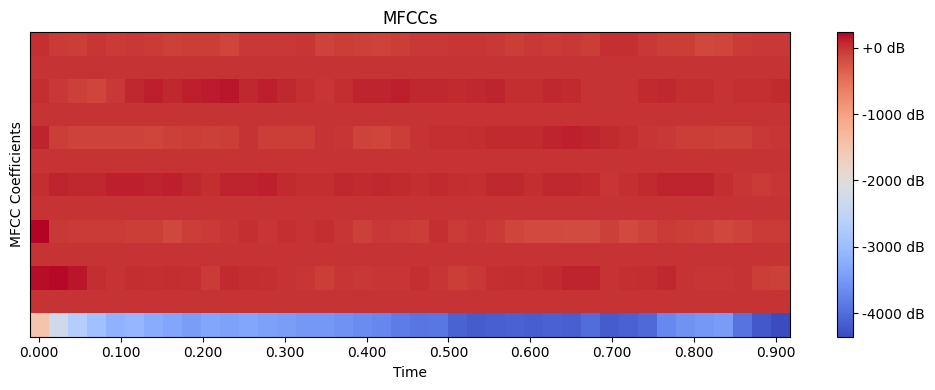

In [26]:
n_ceps = 13  # Number of MFCC coefficients to keep
#mfcc = librosa.feature.mfcc(S=mel_spectrum_db, n_mfcc=n_ceps)
mfcc = librosa.feature.mfcc(S=mel_spectrum_db,dct_type=1, norm=None, lifter=0,n_mfcc=n_ceps,sr=samplerate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [27]:
print(mfcc)

[[-1.47981017e+03 -2.31035951e+03 -2.68669086e+03 -2.94940050e+03
  -3.16301590e+03 -3.08438716e+03 -3.26031342e+03 -3.34780334e+03
  -3.44100819e+03 -3.34701053e+03 -3.38772381e+03 -3.34592269e+03
  -3.41838713e+03 -3.45675803e+03 -3.51823502e+03 -3.52177508e+03
  -3.58834877e+03 -3.66166271e+03 -3.72364775e+03 -3.84990864e+03
  -3.92116482e+03 -3.89979669e+03 -4.10352973e+03 -4.18696027e+03
  -4.15316103e+03 -4.12224902e+03 -4.17255756e+03 -4.13132004e+03
  -4.15052225e+03 -4.00341903e+03 -4.18396769e+03 -4.12464281e+03
  -4.04865803e+03 -3.70440123e+03 -3.56786488e+03 -3.52615421e+03
  -3.45927493e+03 -3.92393841e+03 -4.22754163e+03 -4.35346872e+03]
 [-9.22139805e-05 -3.20775196e-02 -3.83016063e-02 -2.17894970e-01
  -4.91128187e-02  6.61840396e-02  1.85135468e-01  1.58285919e-01
  -7.22461197e-02  1.62717533e-01 -3.89643561e-02 -1.00077821e-02
   1.07417512e-02  6.07874454e-04  7.66451106e-02  4.24265493e-03
   5.53605700e-02 -1.52668137e-03  1.14281149e-01  3.09309433e-02
   5.5340

# Type2

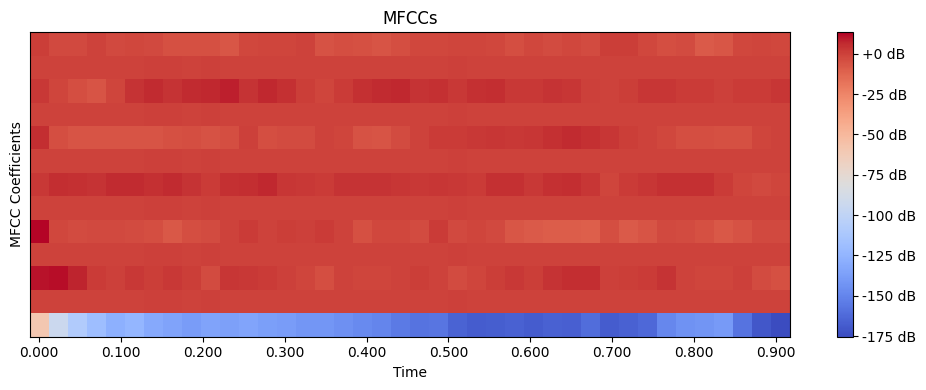

In [28]:
n_ceps = 13  # Number of MFCC coefficients to keep
#mfcc = librosa.feature.mfcc(S=mel_spectrum_db, n_mfcc=n_ceps)
mfcc = librosa.feature.mfcc(S=mel_spectrum_db,dct_type=2, norm='ortho', lifter=0,n_mfcc=n_ceps,sr=samplerate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [29]:
print(mfcc)

[[-5.93557206e+01 -9.30091108e+01 -1.08356018e+02 -1.19053240e+02
  -1.27612677e+02 -1.24424659e+02 -1.31546534e+02 -1.35103455e+02
  -1.38981738e+02 -1.35239955e+02 -1.36563231e+02 -1.34725148e+02
  -1.37647836e+02 -1.39198578e+02 -1.41772919e+02 -1.41973276e+02
  -1.44644257e+02 -1.47512559e+02 -1.50018342e+02 -1.54983128e+02
  -1.57948322e+02 -1.57084595e+02 -1.65418993e+02 -1.68571040e+02
  -1.67327450e+02 -1.66085245e+02 -1.68104659e+02 -1.66449556e+02
  -1.67079332e+02 -1.61320819e+02 -1.68631514e+02 -1.66160600e+02
  -1.63199209e+02 -1.49352980e+02 -1.43854239e+02 -1.42259460e+02
  -1.39645573e+02 -1.58117447e+02 -1.70358237e+02 -1.75419894e+02]
 [-1.38480726e-06 -3.50273106e-03 -4.56016038e-03 -2.30849434e-02
  -5.57303818e-03  6.86762949e-03  2.09206236e-02  1.64024142e-02
  -7.99386443e-03  1.79227873e-02 -4.18063417e-03 -1.59135456e-03
   7.27586663e-04  3.38463804e-04  6.87955413e-03  1.47603754e-03
   6.10329666e-03 -3.91141780e-04  1.09540747e-02  2.70349917e-03
   5.2515

# Type3

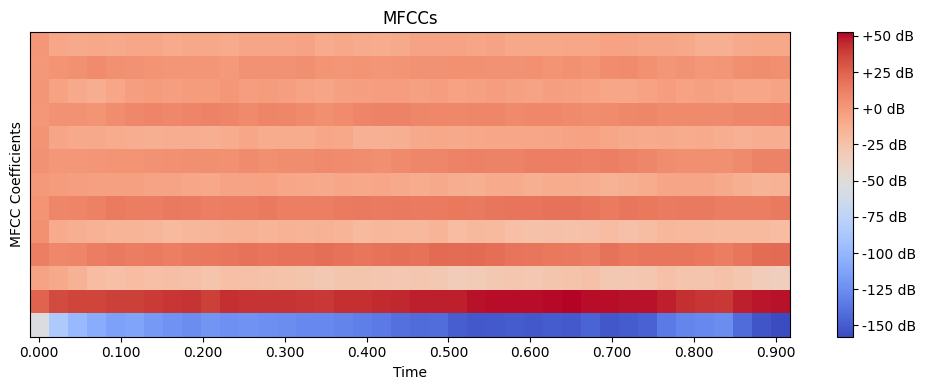

In [30]:
n_ceps = 13  # Number of MFCC coefficients to keep
#mfcc = librosa.feature.mfcc(S=mel_spectrum_db, n_mfcc=n_ceps)
mfcc = librosa.feature.mfcc(S=mel_spectrum_db,dct_type=3, norm='ortho', lifter=0,n_mfcc=n_ceps,sr=samplerate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [31]:
print(mfcc)

[[ -54.93489801  -84.93246226  -98.33956236 -107.41096297 -115.05054747
  -112.37125266 -118.63441256 -121.87493479 -125.27759638 -121.48839982
  -123.51525338 -121.9070141  -124.40576966 -125.70057609 -127.82042329
  -127.73655886 -130.43962709 -132.9127305  -135.27041777 -139.82570911
  -142.55642421 -141.80999155 -148.89398605 -152.04707179 -151.11110915
  -149.96604296 -151.62556178 -150.37909219 -151.18298012 -145.8555614
  -152.08947318 -149.85911141 -147.26012416 -135.04252998 -129.67524223
  -128.08884201 -125.6145103  -142.51970334 -153.31461733 -157.81627703]
 [  24.62659905   33.90364176   36.48247253   36.29848122   38.13454282
    38.40376198   39.71615807   41.27958589   41.95592855   38.46520575
    42.78198561   41.84483023   42.01124463   41.84725064   41.75778477
    40.24665604   42.93567613   43.06182332   44.30071498   45.82223114
    47.47852205   47.01476481   47.49919212   49.57560882   50.7553759
    50.52977833   50.22690532   51.25700461   52.45394588   50.63